**STA 380 Part 2 Exam**

Group Members : Sankalp Kulkarni, Anmol Agarwal, Srishty Mishra, Aishwarya Parida

# Market Segmentation

**Social Marketing data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#Reading the data
Social_Marketing = pd.read_csv("social_marketing.csv")

In [3]:
#Understanding the shape/structure of data
Social_Marketing.shape

(7882, 37)

In [4]:
#Since we have 37 columns, ensuring if anywhere we have missing values in the data

if Social_Marketing.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values in the DataFrame.")

No missing values in the DataFrame.


Now, we would want to know more about the fields which are given to us.


In [5]:
#Understanding the various fields of the given data
Social_Marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
chatter,7882.0,4.398757,3.529126,0.0,2.0,3.0,6.0,26.0
current_events,7882.0,1.526262,1.268890,0.0,1.0,1.0,2.0,8.0
travel,7882.0,1.585004,2.285530,0.0,0.0,1.0,2.0,26.0
photo_sharing,7882.0,2.696777,2.731510,0.0,1.0,2.0,4.0,21.0
uncategorized,7882.0,0.812992,0.935853,0.0,0.0,1.0,1.0,9.0
tv_film,7882.0,1.070287,1.658783,0.0,0.0,1.0,1.0,17.0
sports_fandom,7882.0,1.594012,2.160917,0.0,0.0,1.0,2.0,20.0
politics,7882.0,1.788632,3.031113,0.0,0.0,1.0,2.0,37.0
food,7882.0,1.397488,1.775557,0.0,0.0,1.0,2.0,16.0
family,7882.0,0.863867,1.132562,0.0,0.0,1.0,1.0,10.0


In [6]:
#data types/structures of each column
Social_Marketing.dtypes

Unnamed: 0          object
chatter              int64
current_events       int64
travel               int64
photo_sharing        int64
uncategorized        int64
tv_film              int64
sports_fandom        int64
politics             int64
food                 int64
family               int64
home_and_garden      int64
music                int64
news                 int64
online_gaming        int64
shopping             int64
health_nutrition     int64
college_uni          int64
sports_playing       int64
cooking              int64
eco                  int64
computers            int64
business             int64
outdoors             int64
crafts               int64
automotive           int64
art                  int64
religion             int64
beauty               int64
parenting            int64
dating               int64
school               int64
personal_fitness     int64
fashion              int64
small_business       int64
spam                 int64
adult                int64
d

As per the description in the question,"There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.)" 
We can ommit them as these are the flags created by annotors and not the end users

In [7]:
Unwanted_columns = ["chatter","uncategorized"]
Social_Marketing = Social_Marketing.drop(columns = Unwanted_columns)

Before proceeding, we would want to take a look at outliers since they will impact the final outcomes and also we would want to know about the spread/range of the fields and if requried, we would want to ensure that our data remains robust

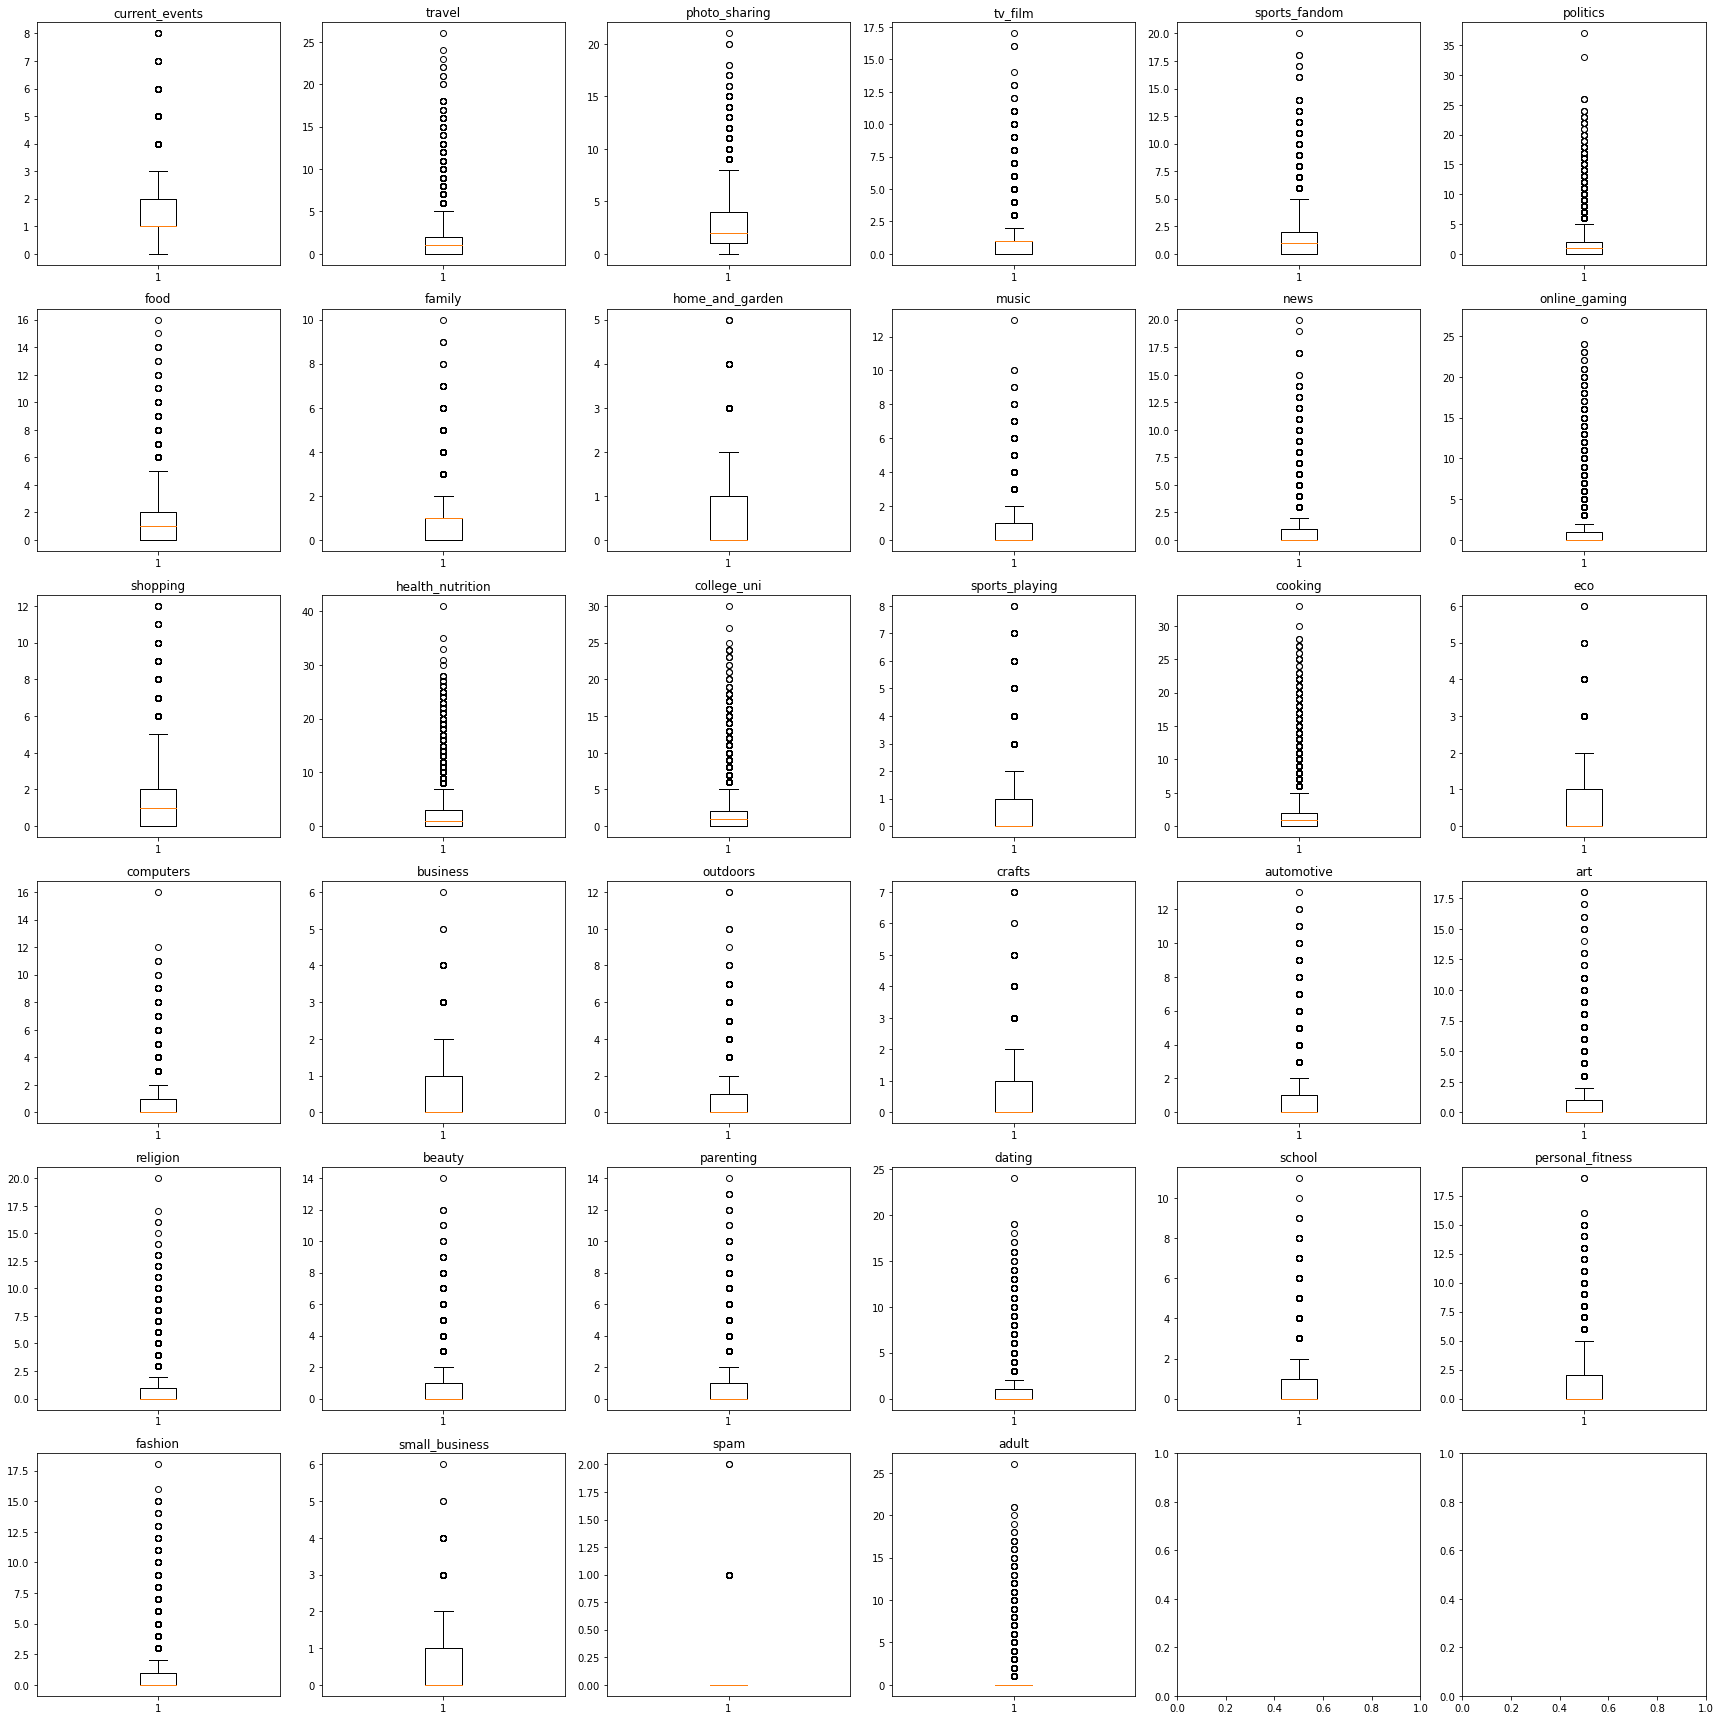

                  Total Outliers  Below Lower Whisker  Above Upper Whisker
current_events               569                    0                  569
travel                       399                    0                  399
photo_sharing                338                    0                  338
tv_film                      945                    0                  945
sports_fandom                490                    0                  490
politics                     730                    0                  730
food                         276                    0                  276
family                       664                    0                  664
home_and_garden              143                    0                  143
music                        420                    0                  420
news                        1197                    0                 1197
online_gaming                889                    0                  889
shopping                 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample DataFrame for illustration
np.random.seed(0)

# Grid creation
num_rows, num_cols = 6, 6

# Grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 24))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Lists to store outlier counts
total_outliers = []
below_lower_whisker = []
above_upper_whisker = []

for i, col in enumerate(Social_Marketing.columns[1:], 1):  # Start from the second column
    # Create a boxplot for the current column
    box = axes[i - 1].boxplot(Social_Marketing[col])
    
    # Calculate whisker values
    lower_whisker = box['caps'][0].get_ydata()[0]
    upper_whisker = box['caps'][1].get_ydata()[0]
    
    # Calculate outliers
    outliers = Social_Marketing[col][(Social_Marketing[col] < lower_whisker) | (Social_Marketing[col] > upper_whisker)]
    
    # Count and store outlier statistics
    total_outliers.append(len(outliers))
    below_lower_whisker.append((Social_Marketing[col] < lower_whisker).sum())
    above_upper_whisker.append((Social_Marketing[col] > upper_whisker).sum())
    
    # Title for each subplot
    axes[i - 1].set_title(col)

# Add space between subplots to improve readability
plt.tight_layout()

# Plotting all graphs
plt.show()

# Display outlier statistics
outlier_stats = pd.DataFrame({
    'Total Outliers': total_outliers,
    'Below Lower Whisker': below_lower_whisker,
    'Above Upper Whisker': above_upper_whisker
}, index=Social_Marketing.columns[1:])

print(outlier_stats)


**Observations**<br>1. All of the variables are having outliers above the top whisker, indicating that they are all positively skewed/right skewed. 
<br> 2. To confirm the claim made in statment 1 and to support it by the numbers, we also looked at actual numbers below the lower whiskers and upper whiskers and it confirmed the same. 
<br> 3. In terms of number of outliers, *health nutrition*,*college uni*,*cooking*,*online gaming* and *politics* seem to have relatively higher numbers of outliers. 
<br> 4. The high variance in the predictors can help better explain the variance in response leading to better fit and improved accuracy 
<br> 5. Vastly varying predictors will ensure that the underlying patterns are captured and when new data is fed to the model, it will be able to make accurate predictions about them

*Please note that we are not treating any outliers as we are dealing with hardly 8K rows. One possible way is to clip the outliers using Winsorization and then proceed but since we are going to try K means and it is a good practise but not absolutely mndatory for this algorithm, for now we are skipping it*

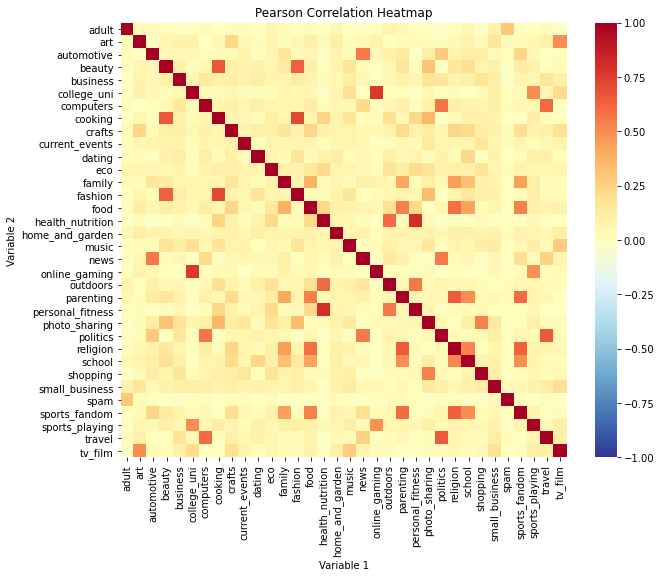

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
cormat = Social_Marketing.iloc[:, 1:].corr()

#Melt the correlation matrix for plotting i.e. change the orientation of it
melted_cormat = cormat.reset_index().melt(id_vars='index')

#Rename the columns for the melted DataFrame
melted_cormat.columns = ['Var1', 'Var2', 'value']

#Plot the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(melted_cormat.pivot(index='Var1', columns='Var2', values='value'),
            cmap='RdYlBu_r', fmt="0.0f", vmin=-1, vmax=1)

#Plot title and labels
plt.title('Pearson Correlation Heatmap')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

#Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

#Show plot
plt.show()


#### Initial Readings :
1. The first look at the scatterplot suggests fewer stronger correlations among predictors as the high instensity spots are lesser in numbers
2. Most of them suggest weak correaltion as per the scaling color grading scheme
3. We will try to highlight/focus on few cases of stronger correlation in the next part

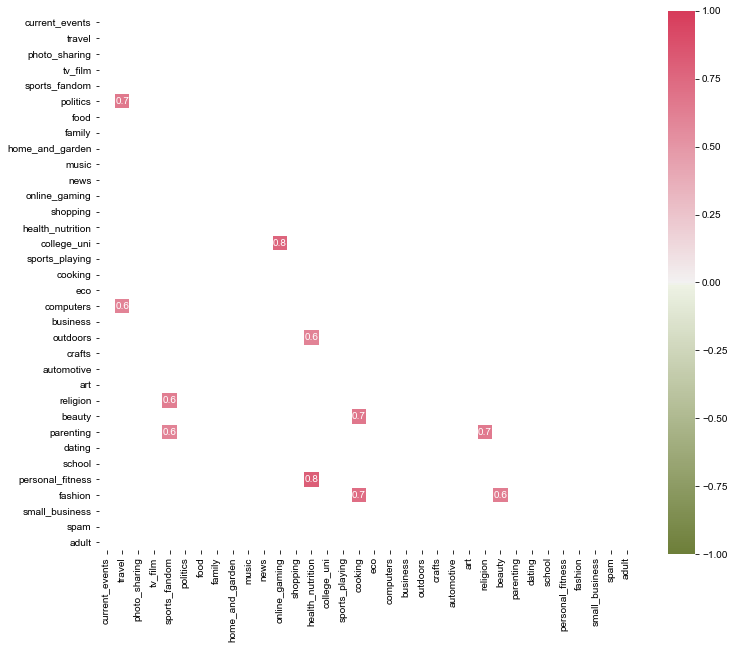

In [10]:
#Calculate correlation matrix
corr_matrix = Social_Marketing.corr()

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


#Set up the matplotlib figure
plt.figure(figsize=(12, 10))

#Create a diverging color palette
cmap = sns.diverging_palette(100, 5, as_cmap=True)

#Set values less than 0.6 to NaN
corr_matrix = corr_matrix.where(np.abs(corr_matrix) >= 0.6)

#Plot the heatmap
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".1f", mask=mask, cbar=True,
            linewidths=.5, square=True, center=0, vmin=-1, vmax=1)

#Set the font scale
sns.set(font_scale=0.9)

#Show plot
plt.show()

**Observations**
<br>1. When focused on pairs showing strong correlations (>0.6), we found the followig pairs which can possibly help us define similar behavioural patterns
<br> a] 'health_nutrition' and 'personal_fitness'
<br> b] 'collge_uni' and 'online_gaming'
<br> c] 'cooking' with 'beauty' and 'fashion' both
<br> d] 'parenting' with 'religion'


### K-Means Algorithms

We will start and try out with the initial algorithms taught in the class about K-means. Also, given that we have ~37 features and ~8K data points, K-means can help us idenitfy similar group of clusters

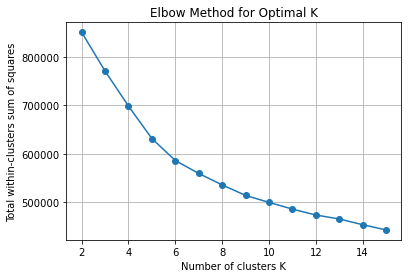

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Set a random seed for reproducibility
np.random.seed(101)

# Function to compute total within-cluster sum of squared errors (WSS)
def wss(Social_Marketing, k):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=0)
    kmeans.fit(Social_Marketing)
    return kmeans.inertia_

# Compute for clusters 2-15
k = np.arange(2, 16)

# Compute WSS values for different values of k
wss_values = [wss(Social_Marketing.iloc[:, 1:], i) for i in k]

# Plot WSS
plt.plot(k, wss_values, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Total within-clusters sum of squares")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


#### Choosing K
The above graph indicates that after K=6 , roughly the within cluster sum of squares drops at a rapid rate and hence we will be takig K=6 as value to initiate the clustering algorithm

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data to center and scale it
X2 = scaler.fit_transform(Social_Marketing.iloc[:, 1:])

# Extract the centers and scales from the rescaled data
mu = scaler.mean_
sigma = scaler.scale_

# Convert the scaled data back to a DataFrame
X2_df = pd.DataFrame(X2, columns=Social_Marketing.columns[1:])

# 'mu' contains the means of the original features (centered data)
# 'sigma' contains the standard deviations of the original features (scaled data)
# 'X2_df' is the DataFrame with the centered and scaled data


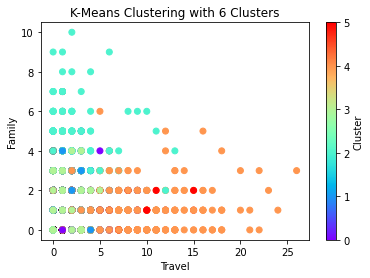

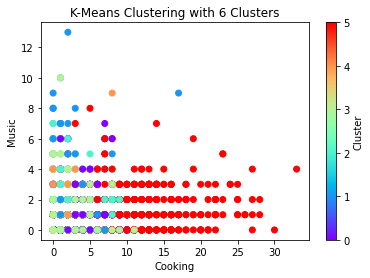

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a KMeans instance with 6 clusters and 25 starts
clust1 = KMeans(n_clusters=6, n_init=25, random_state=0)

# Fit the KMeans model to the scaled data
clust1.fit(X2)

# Add the cluster labels as a new column to the DataFrame 'sm_1'
Social_Marketing['cluster'] = clust1.labels_

# Plot 'travel' against 'family' with color-coded clusters
plt.scatter(Social_Marketing['travel'], Social_Marketing['family'], c=Social_Marketing['cluster'], cmap='rainbow')
plt.xlabel('Travel')
plt.ylabel('Family')
plt.title('K-Means Clustering with 6 Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Plot 'cooking' against 'music' with color-coded clusters
plt.scatter(Social_Marketing['cooking'], Social_Marketing['music'], c=Social_Marketing['cluster'], cmap='rainbow')
plt.xlabel('Cooking')
plt.ylabel('Music')
plt.title('K-Means Clustering with 6 Clusters')
plt.colorbar(label='Cluster')
plt.show()


Given that we have ~36 features, it will not be prudent to plot all features in the above format and it will be a difficult task to interpret them all at once. Hence, we need a different type of visualization.

In [44]:
# Create a KMeans instance with 6 clusters and 25 starts
kmeans = KMeans(n_clusters=6, n_init=25, random_state=0)


In [45]:
# Fit the KMeans model to the scaled data 'X2'
Social_Marketing['cluster_num'] = kmeans.fit_predict(X2)

In [50]:
Social_Marketing.columns

Index(['Unnamed: 0', 'current_events', 'travel', 'photo_sharing', 'tv_film',
       'sports_fandom', 'politics', 'food', 'family', 'home_and_garden',
       'music', 'news', 'online_gaming', 'shopping', 'health_nutrition',
       'college_uni', 'sports_playing', 'cooking', 'eco', 'computers',
       'business', 'outdoors', 'crafts', 'automotive', 'art', 'religion',
       'beauty', 'parenting', 'dating', 'school', 'personal_fitness',
       'fashion', 'small_business', 'spam', 'adult', 'cluster', 'cluster_num'],
      dtype='object')

In [46]:
# Compute the cluster means for each cluster and each column in 'Social Marketing'
clus_summ = Social_Marketing.groupby('cluster_num').mean(numeric_only=True)

In [51]:
clus_summ.columns

Index(['current_events', 'travel', 'photo_sharing', 'tv_film', 'sports_fandom',
       'politics', 'food', 'family', 'home_and_garden', 'music', 'news',
       'online_gaming', 'shopping', 'health_nutrition', 'college_uni',
       'sports_playing', 'cooking', 'eco', 'computers', 'business', 'outdoors',
       'crafts', 'automotive', 'art', 'religion', 'beauty', 'parenting',
       'dating', 'school', 'personal_fitness', 'fashion', 'small_business',
       'spam', 'adult', 'cluster'],
      dtype='object')

In [53]:
# Drop the 'cluster_num' column from 'clus_summ'
clus_summ.drop(columns='cluster', inplace=True)

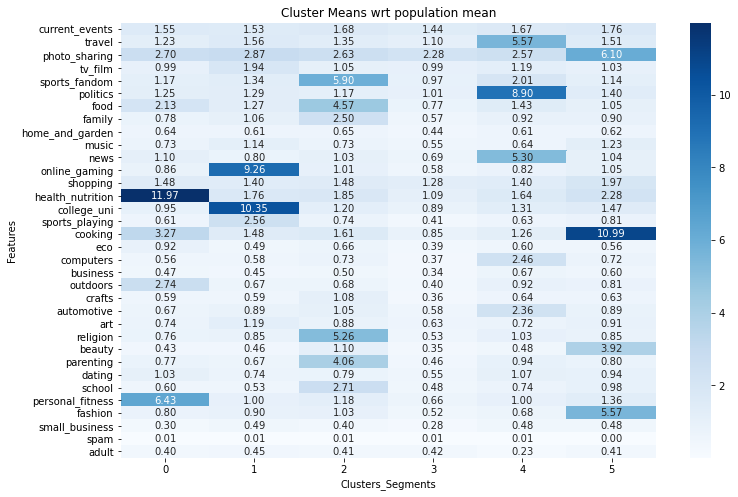

In [58]:
# Create a heatmap using seaborn for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(clus_summ.T, cmap='Blues', annot=True, fmt=".2f")
plt.title('Cluster Means wrt population mean')
plt.xlabel('Clusters_Segments')
plt.ylabel('Features')
plt.show()

The heatmap above is easy to interpret. It shows how each cluster differs from the population wrt mean of population and each cluster. It will help to highlight the specific behavioural traits of each of the cluster. Based on this peculiar characteristics, focused marketing campaigns can be designed to target specific group of people with optimal use of resources. <br> Moving on to the conlusions of this exercise and findings to be shared with the NutrientH20 -

### Conclusion:

1. Cluster 0 : *Health and Fitness Enthusiasts* since they talk/tweet mostly abour 'Health Nutrition', 'Personal Fitness', 'Cooking' and 'Outdoors'
2. Cluster 1 : *College Students* since they tweet mostly about 'College_uni', 'online gaming'and 'Sports Playing'
3. Cluster 2 : *People with family* since they tweet mostly about 'religion','parenting','food', 'sports fandom'and 'school'
4. Cluster 3 : *Ambiguous* since there is no clear segment description coming out like other clusters but prominent features like 'photo sharing','current_events', 'travel', 'shopping' hints towards possibly younger/teenage group
5. Cluster 4 : *Working class/well-read people* since they are talking about 'politics', 'travel','news','computers', 'automotives'
6. Cluster 5 : *Highly active younger social media users* possibly young females as they use words like 'Cooking', 'photo-sharing', 'beauty', 'fashion'